# seeds Data Set - https://archive.ics.uci.edu/ml/datasets/seeds#

## Data Set Information

The examined group comprised kernels belonging to three different varieties of wheat: Kama, Rosa and Canadian, 70 elements each, randomly selected for 
the experiment. High quality visualization of the internal kernel structure was detected using a soft X-ray technique. It is non-destructive and considerably cheaper than other more sophisticated imaging techniques like scanning microscopy or laser technology. The images were recorded on 13x18 cm X-ray KODAK plates. Studies were conducted using combine harvested wheat grain originating from experimental fields, explored at the Institute of Agrophysics of the Polish Academy of Sciences in Lublin. 

The data set can be used for the tasks of classification and cluster analysis.

## Attribute Information

To construct the data, seven geometric parameters of wheat kernels were measured: 
1. area A, 
2. perimeter P, 
3. compactness C = 4*pi*A/P^2, 
4. length of kernel, 
5. width of kernel, 
6. asymmetry coefficient 
7. length of kernel groove. 
All of these parameters were real-valued continuous.

In [128]:
# Import data set and create a data frames
import pandas as pd

dataframe = pd.read_csv('seeds_dataset.txt', delim_whitespace=True, header=None, usecols=[*range(0, 8)], names=['area A', 'perimeter P', 'compactness C', 'kernel length', 'kernel width', 'asymmetry coefficient', 'kernel groove length', 'wheat variant'])
data = pd.DataFrame.copy(dataframe)
data_scaled = pd.DataFrame.copy(dataframe)

# Normalize data in data_scaled
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# The columns that we want to scale
columns = ['area A', 'perimeter P', 'compactness C', 'kernel length', 'kernel width', 'asymmetry coefficient', 'kernel groove length']
# Scale the data
data_scaled[columns] = scaler.fit_transform(data_scaled[columns])
# Convert the array back to a dataframe
data_scaled = pd.DataFrame(data_scaled)

Orginal data:


,area A,perimeter P,compactness C,kernel length,kernel width,asymmetry coefficient,kernel groove length,wheat variant
count,210.0,210.0,210.0,210.0,210.0,210.0,210.0,210.0
mean,14.8,14.6,0.9,5.6,3.3,3.7,5.4,2.0
std,2.9,1.3,0.0,0.4,0.4,1.5,0.5,0.8
min,10.6,12.4,0.8,4.9,2.6,0.8,4.5,1.0
25%,12.3,13.4,0.9,5.3,2.9,2.6,5.0,1.0
50%,14.4,14.3,0.9,5.5,3.2,3.6,5.2,2.0
75%,17.3,15.7,0.9,6.0,3.6,4.8,5.9,3.0
max,21.2,17.2,0.9,6.7,4.0,8.5,6.6,3.0


Scaled data:


,area A,perimeter P,compactness C,kernel length,kernel width,asymmetry coefficient,kernel groove length,wheat variant
count,210.0,210.0,210.0,210.0,210.0,210.0,210.0,210.0
mean,0.4,0.4,0.6,0.4,0.4,0.4,0.4,2.0
std,0.3,0.3,0.2,0.2,0.3,0.2,0.2,0.8
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
25%,0.2,0.2,0.4,0.2,0.2,0.2,0.3,1.0
50%,0.4,0.4,0.6,0.4,0.4,0.4,0.3,2.0
75%,0.6,0.7,0.7,0.6,0.7,0.5,0.7,3.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0


Text(0.5, 1.02, 'Normalized data')

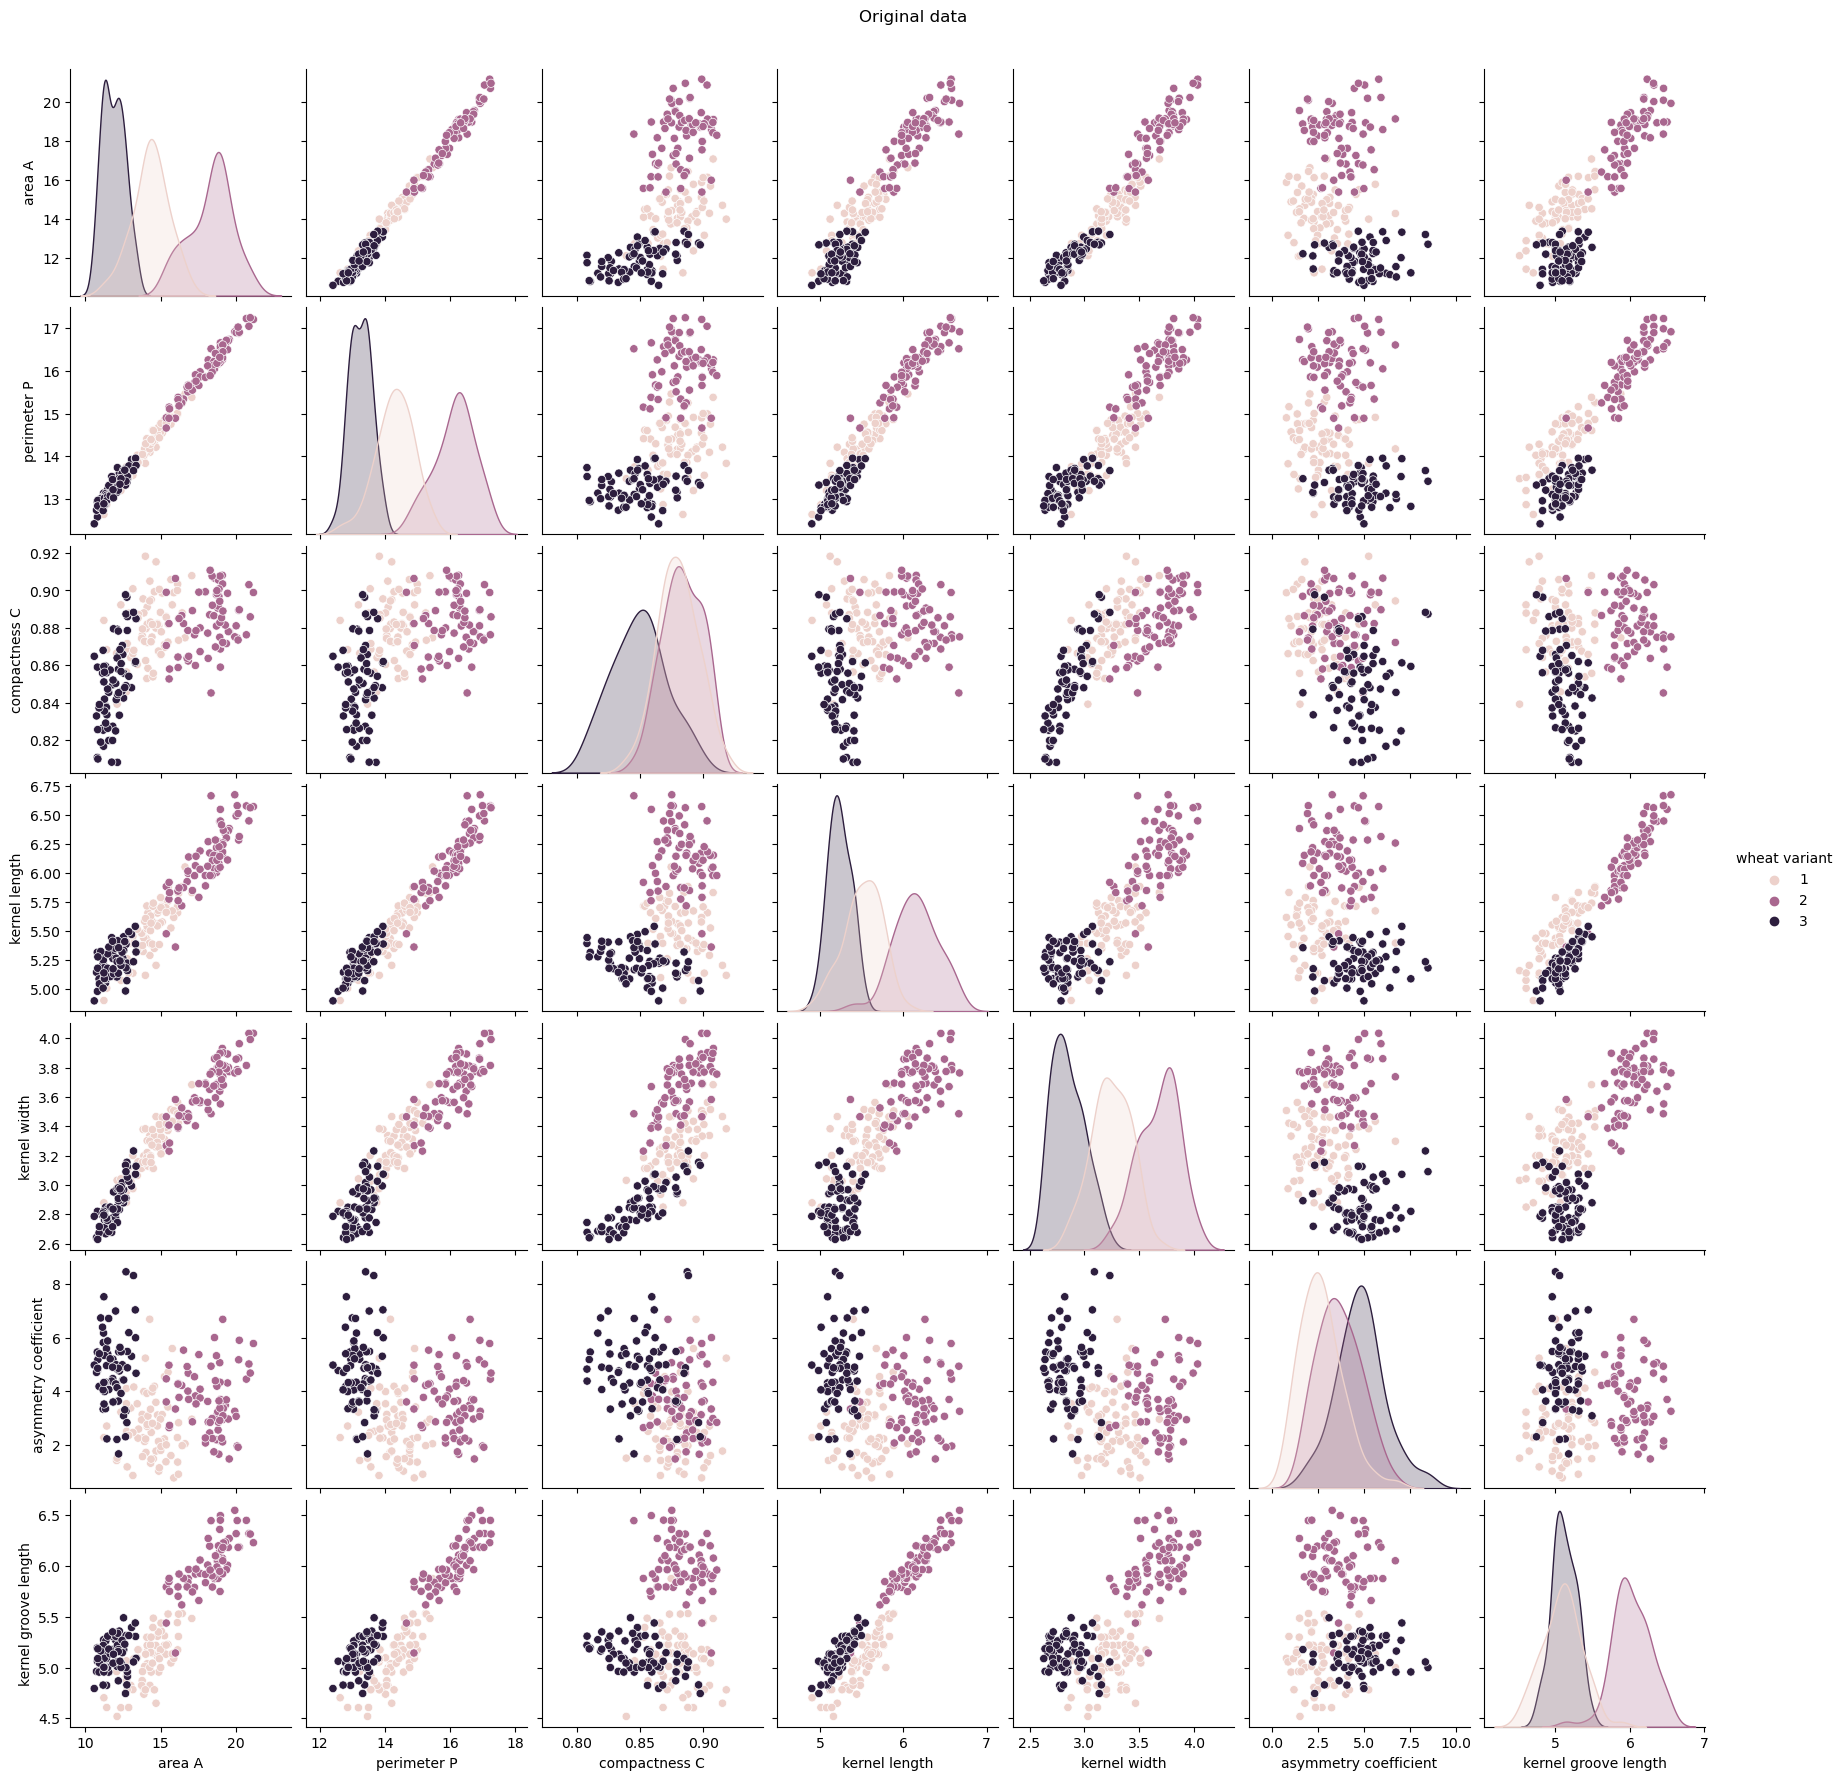

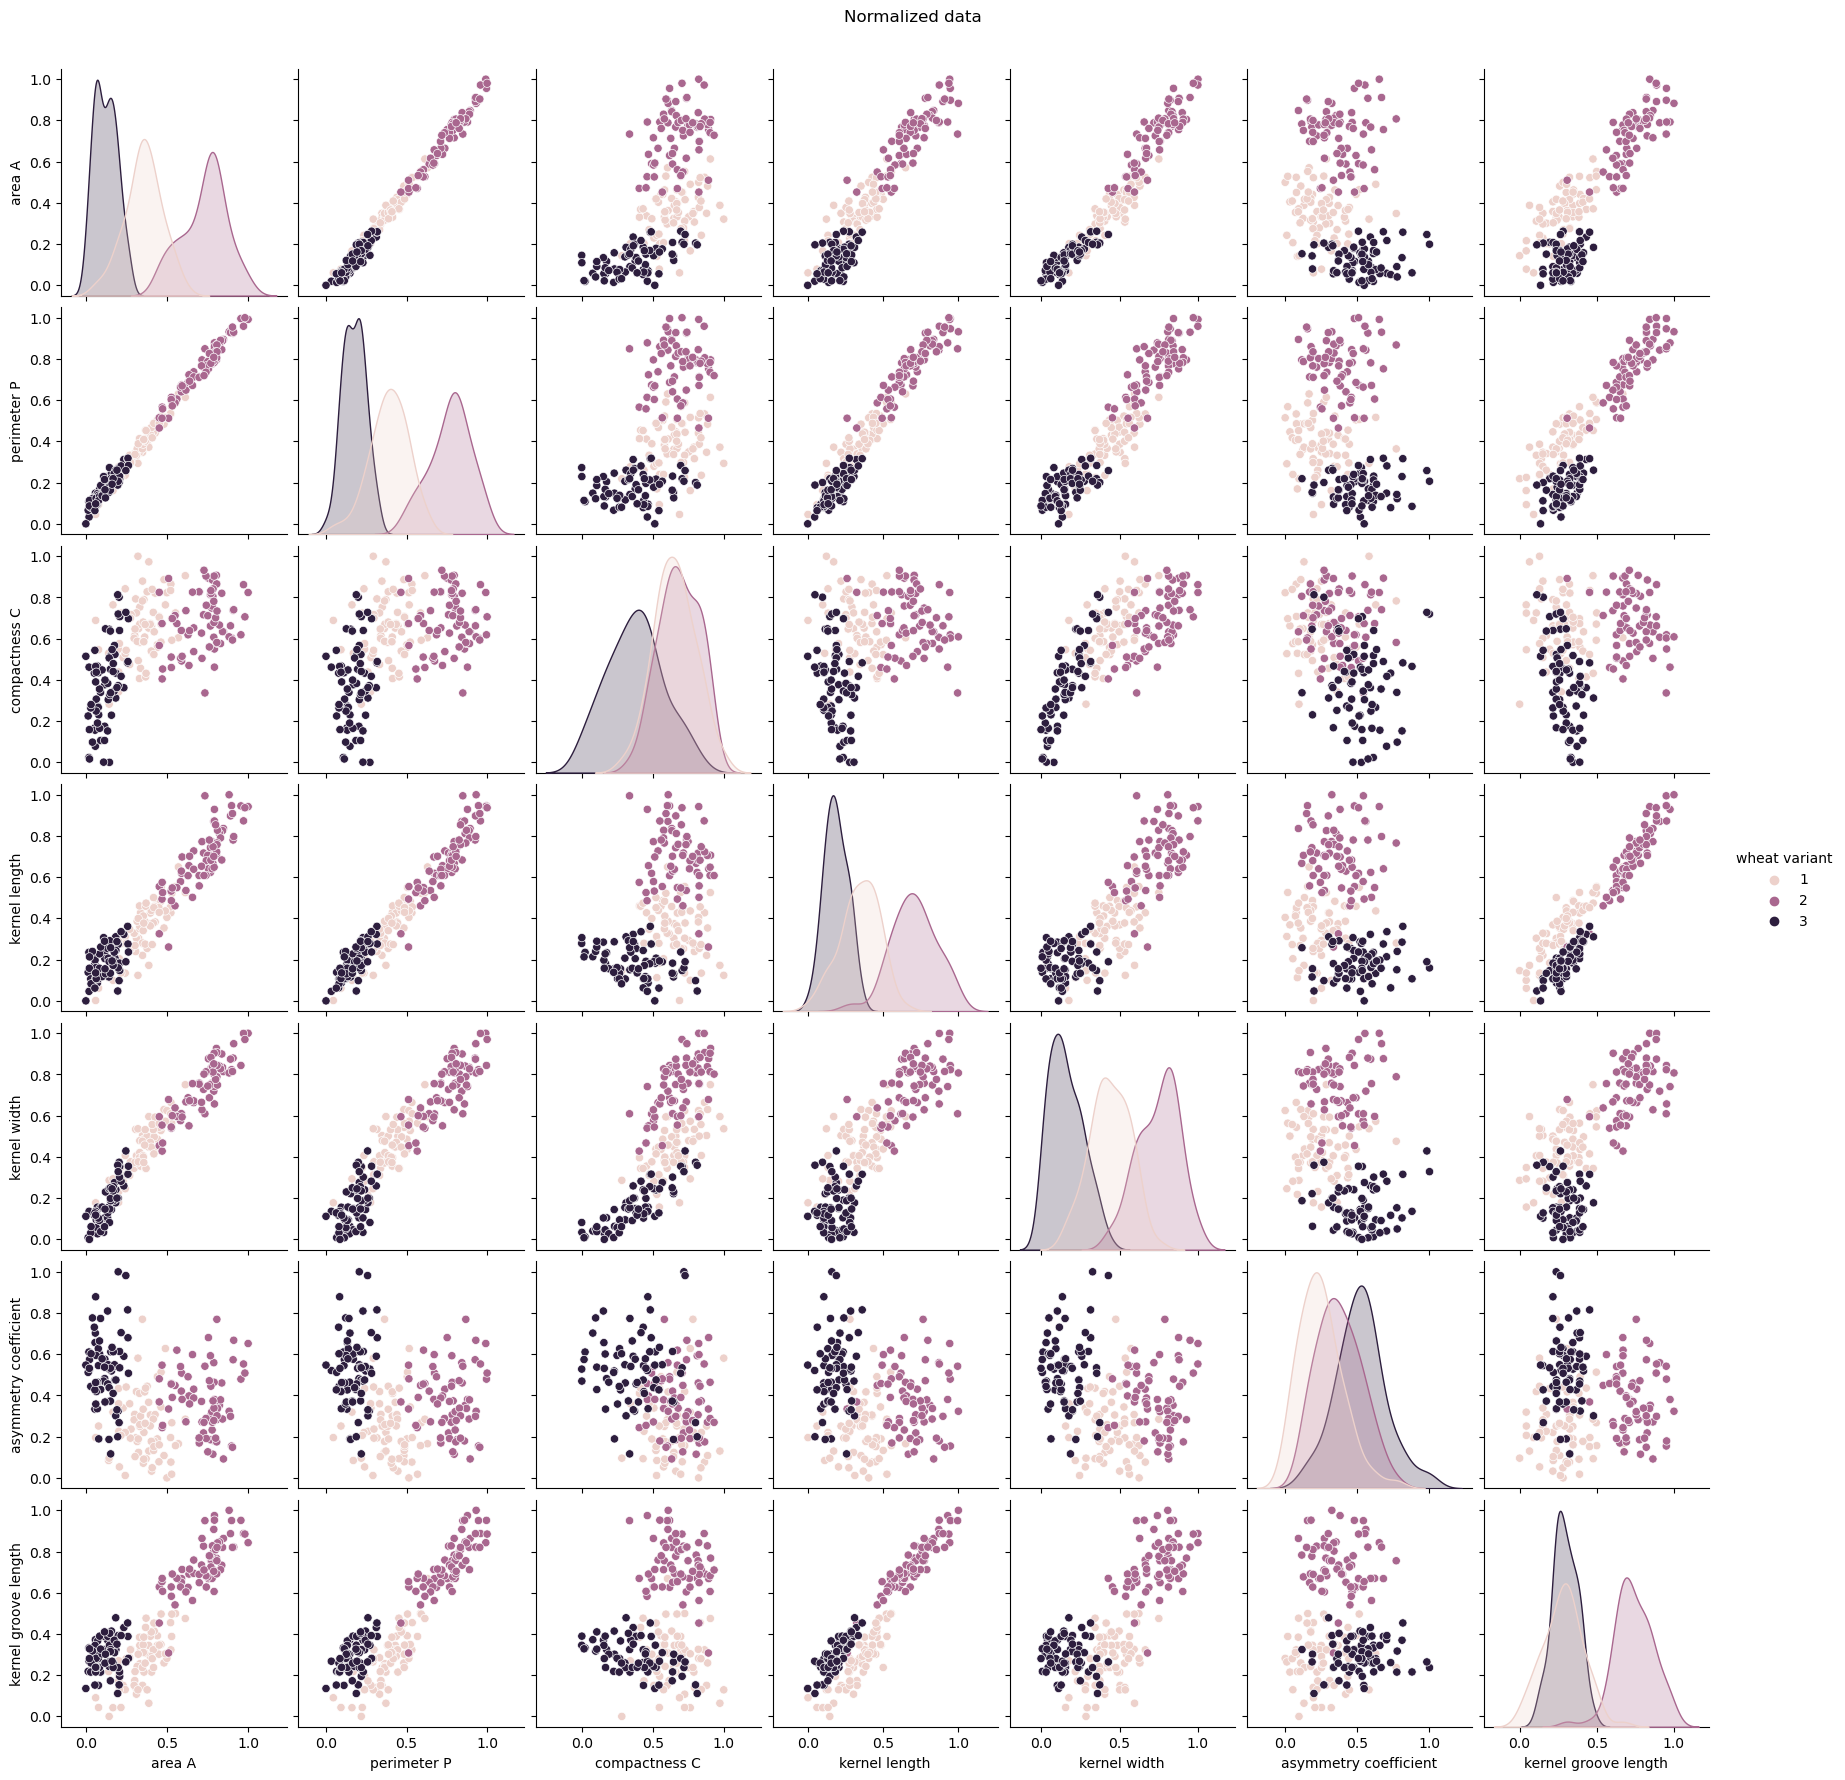

In [129]:
# Do some exploratory data analysis
import seaborn as sns
import matplotlib.pyplot as plt

print('Orginal data:')
display(round(data.describe(),1))

print('Scaled data:')
display(round(data_scaled.describe(),1))

ax1 = sns.pairplot(data, hue = 'wheat variant')
ax1.fig.suptitle("Original data", y=1.02)
ax2 = sns.pairplot(data_scaled, hue = 'wheat variant')
ax2.fig.suptitle("Normalized data", y=1.02)

## Run with original data

In [130]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split
x = data.drop('wheat variant', axis = 1)
y = data['wheat variant']

x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x, y, test_size = 0.25)

In [131]:
# Train the decision tree model and make predictions
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=1234)
model.fit(x_training_data, y_training_data)
# Predict the test set results
predictions = model.predict(x_test_data)
predictions

array([1, 1, 2, 3, 2, 3, 3, 1, 2, 3, 2, 2, 2, 2, 3, 2, 1, 3, 1, 3, 3, 3,
       3, 1, 2, 2, 2, 1, 1, 3, 1, 3, 1, 2, 3, 2, 2, 3, 1, 1, 3, 3, 2, 2,
       1, 3, 3, 2, 3, 1, 3, 2, 1])

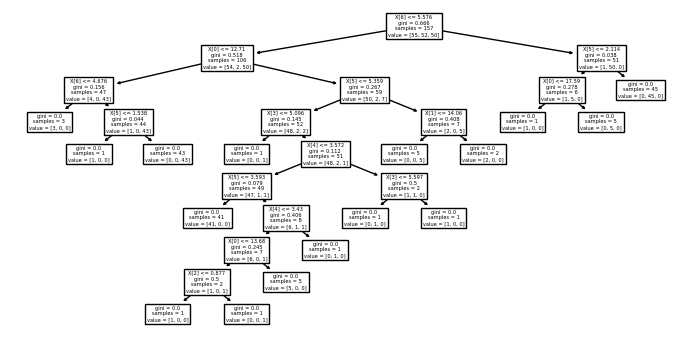


Classification report:
               precision    recall  f1-score   support

           1       0.93      0.93      0.93        15
           2       1.00      1.00      1.00        18
           3       0.95      0.95      0.95        20

    accuracy                           0.96        53
   macro avg       0.96      0.96      0.96        53
weighted avg       0.96      0.96      0.96        53


Confustion matrix:


Predicted,1,2,3
Actual,,,
1,14,0,1
2,0,18,0
3,1,0,19


In [132]:
# Measure the accuracy of the model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import tree

# Generate a decision tree
tree.plot_tree(model)
plt.show()

# Print the classification report
print('\nClassification report:\n', classification_report(y_test_data, predictions))

classification_report(y_test_data,predictions)

# Print the Confusion matrix
print('\nConfustion matrix:')
#print('\nConfustion matrix:\n', confusion_matrix(y_test_data, predictions))
pd.crosstab(y_test_data, predictions, rownames=['Actual'], colnames=['Predicted'])

## Run with normalized data

In [ ]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split
x = data_scaled.drop('wheat variant', axis = 1)
y = data_scaled['wheat variant']

x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x, y, test_size = 0.25)

In [ ]:
# Train the decision tree model and make predictions
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=1234)
model.fit(x_training_data, y_training_data)
# Predict the test set results
predictions = model.predict(x_test_data)
predictions



In [ ]:
# Run model 10 times and print the average accuracy
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, x_training_data, y_training_data, cv=69)
print('Average accuracy: ', round(scores.mean(), 2))

In [ ]:
print(len(x_training_data))

In [ ]:
# Measure the accuracy of the model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import tree

# Generate a decision tree
tree.plot_tree(model)
plt.show()

# Print the classification report
print('\nClassification report:\n', classification_report(y_test_data, predictions))

classification_report(y_test_data,predictions)

# Print the Confusion matrix
print('\nConfustion matrix:')
#print('\nConfustion matrix:\n', confusion_matrix(y_test_data, predictions))
pd.crosstab(y_test_data, predictions, rownames=['Actual'], colnames=['Predicted'])